<a href="https://colab.research.google.com/github/arpitj07/Machine-Learning-with-Scikit-Learn/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Working with Colab is bit different from Jupyter Notebook. You have to do some extra stuffs to import data and setup working directory**

In [0]:
import os

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
work_dir = "/content/drive/My Drive"

In [0]:
os.chdir(work_dir + "/Machine Learning")

## Importing modules

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
cancer = load_breast_cancer()
#print(cancer.DESCR)

In [8]:
print(cancer.feature_names)
print(cancer.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [9]:
cancer.data.shape

(569, 30)

In [0]:
# from google.colab import files
# files.upload()

In [11]:
!ls

breast-cancer-wisconsin-data.zip  cache  data.csv  Untitled0.ipynb


In [0]:
import pandas as pd

df = pd.read_csv("data.csv" , delimiter=',')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


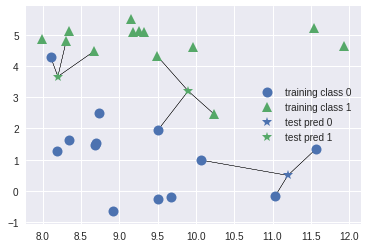

In [14]:
#!pip install mglearn
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [0]:
X_train, X_tes, y_train, Y_test = train_test_split(cancer.data , cancer.target , stratify=cancer.target , random_state=42)

## Defining Model

In [16]:
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
print("Accuracy of KNN on Training set for n=5 : {:.3f}".format(knn.score(X_train,y_train)))
print("Accuracy of KNN on Testing set for n=5 : {:.3f}".format(knn.score(X_tes,Y_test)))

Accuracy of KNN on Training set for n=5 : 0.946
Accuracy of KNN on Testing set for n=5 : 0.930


## hyper parameter Tuning

Text(0.5, 0, 'n-neighbors')

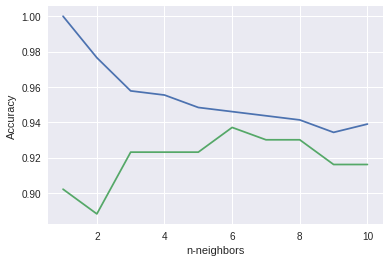

In [20]:
X_train, X_tes, y_train, Y_test = train_test_split(cancer.data , cancer.target , stratify=cancer.target , random_state=66)

training_accuracy=[]
testing_accuracy=[]

neighbors_set = range(1,11)

for neighbor in neighbors_set:
  
  clf = KNeighborsClassifier(n_neighbors=neighbor)
  clf.fit(X_train,y_train)
  
  training_accuracy.append(clf.score(X_train, y_train))
  testing_accuracy.append(clf.score(X_tes, Y_test))
  
  
plt.plot(neighbors_set , training_accuracy , label='Acc of Training set')
plt.plot(neighbors_set , testing_accuracy , label='Acc of Test set')
plt.ylabel('Accuracy')
plt.xlabel('n-neighbors')